# Visualizing MCMC results

Use this notebook to visualize and save statistics from previously run MCMC samples.

Code adapted from [this tutorial.](https://emcee.readthedocs.io/en/stable/tutorials/monitor/)

In [22]:
import os
import numpy as np
from emcee.backends import HDFBackend
from corner import corner
import matplotlib.pyplot as plt
from IPython.display import display, Math
%matplotlib inline

In [23]:
# Change path to output file
dirname = os.getcwd()
filename  = '../output.hdf5'
filepath = os.path.join(dirname, filename)
save_figures = False
figures_prefix = 'figures/mcmc/'

In [24]:
reader = HDFBackend(filename, read_only=True)
tau = reader.get_autocorr_time(quiet=True)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
samples = reader.get_chain(discard=burnin, flat=True, thin=thin)
log_prob_samples = reader.get_log_prob(discard=burnin, flat=True, thin=thin)
n_params = samples.shape[-1]

print("Estimated autocorrelation times: {0}".format(tau))
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [50.2652733  37.32256637 56.53189918 53.14857443]


Estimated autocorrelation times: [50.2652733  37.32256637 56.53189918 53.14857443]
burn-in: 113
thin: 18
flat chain shape: (1568, 4)
flat log prob shape: (1568,)


In [25]:
# Change labels to appropriate names
labels = [r'H_0', r'\alpha', r'\beta', r'c']
plot_labels = [r'$' + label + r'$' for label in labels[:n_params]]

Visualizing the walkers' trajectories along the chain:

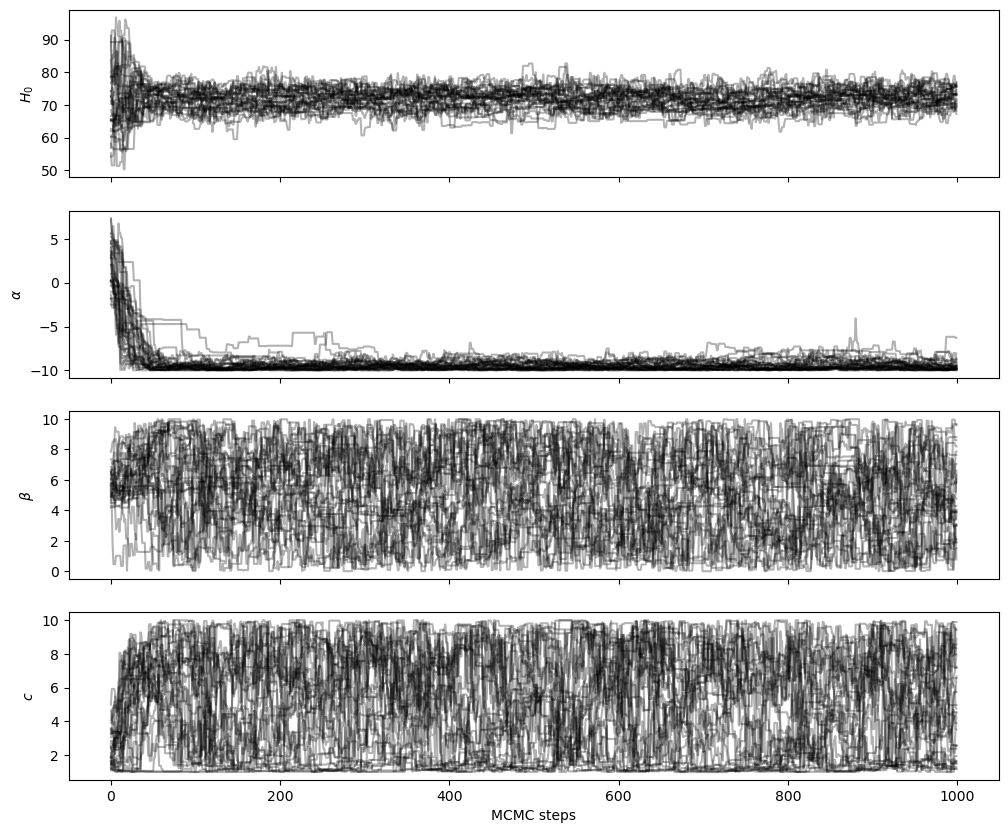

In [26]:
fig, axs = plt.subplots(len(labels[:n_params]), figsize=(3 * len(labels[:n_params]), 10), sharex=True)
raw_samples = reader.get_chain()
for i, (ax, label) in enumerate(zip(axs, plot_labels)):
    ax.plot(raw_samples[:,  :,  i], c='k', label=label, alpha=0.3)
    ax.set_ylabel(label)

axs[-1].set_xlabel('MCMC steps')
plt.show()

Corner plot of the samples:

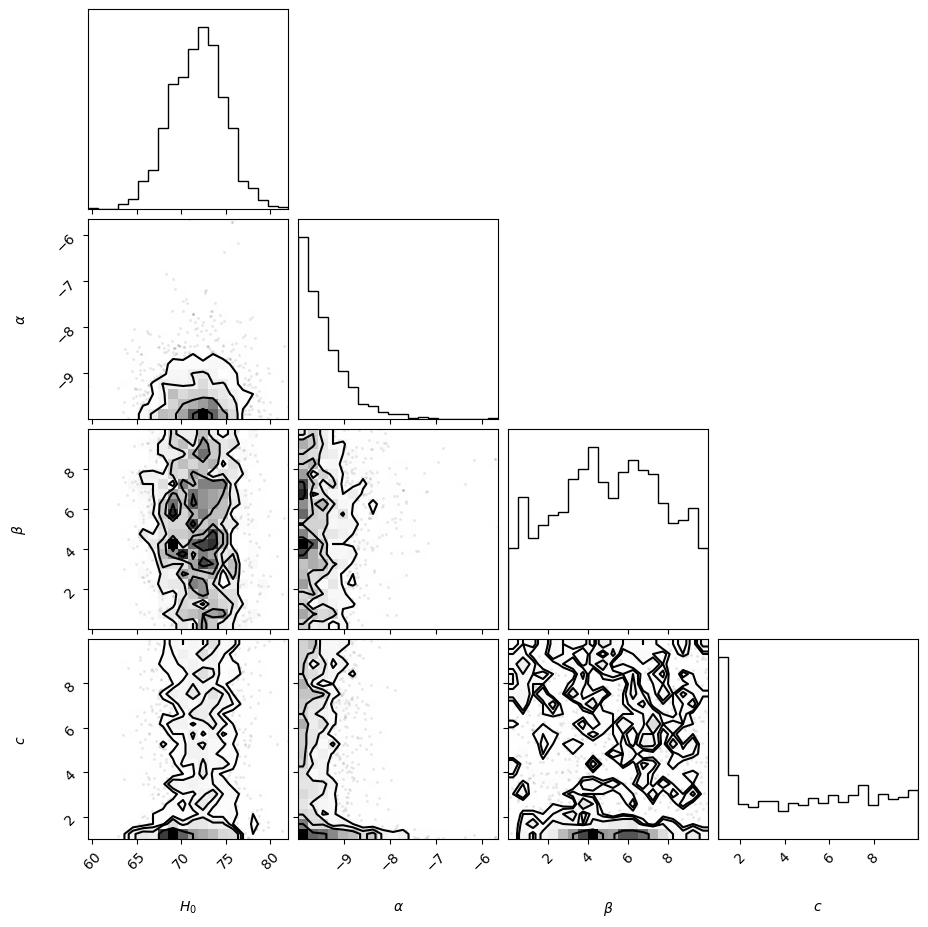

In [27]:
fig = corner(samples, labels=plot_labels)
if save_figures:
    fig.savefig(figures_prefix + 'corner.png', dpi=400)

Summary statistics of each inferred parameter based on $q=0.16, 0.5, 0.84$ quantiles:

In [28]:
quantiles = [0.16, 0.5, 0.84]
statistics = np.quantile(samples, quantiles, axis=0).T
for label, stat in zip(labels, statistics):
    median = stat[1]
    lower, upper = np.diff(stat)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(median, lower, upper, label)
    display(Math(txt))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>